# Homework 2: Bike Sharing
## EDA and Visualization

## Introduction

This assignment includes both specific tasks to perform and open-ended questions to investigate. The open-ended questions ask you to think creatively and critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to public and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible as similarity is subject to the readers.

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 


## Submission - IMPORTANT, PLEASE READ
For this assignment and future assignments (homework and projects) you will also submit your free response and plotting questions to gradescope. To do this, you can download as PDF (`File->Download As->PDF via Latex (.pdf)`). You are responsible for submitting and tagging your answers in gradescope. For each free response and plotting question, please include:

1. Relevant code used to generate the plot or inform your insights
2. The written free response or plot

We are doing this to make it easier on our graders and for you, in the case you need to submit a regrade request. Gradescope (as of now) is still better for manual grading.


### Score breakdown



Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 2
Question 2d | 2
Question 3a | 5
Question 3b | 3
Question 3c | 2
Question 4a | 4
Question 4b | 3
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 2
Total | 41

In [3]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown


## Loading Bike Sharing Data
The data we are exploring is data on bike sharing in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [4]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/fa18/raw/gh-pages/assets/datasets/hw2-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Mon Mar 30 09:15:47 2020
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [5]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [6]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [7]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the dataframe matches the number of lines in the file, minus the header row.

In [8]:
bike.shape

(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

Note if you want to revert the changes run the cell that reloads the csv.

**Hint:**  One approach is to use the replace method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [9]:
# Modify holiday weekday, workingday, and weathersit here
# Hint: one strategy involves df.replace(...)

### BEGIN SOLUTION
factor_dict = {
    'holiday': {1: "yes", 0: "no"},
    'weekday': {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"},
    'workingday': {1: "yes", 0: "no"},
    'weathersit': {1: "Clear", 2: "Mist", 3: "Light", 4: "Heavy"}
}
bike.replace(factor_dict, inplace = True)
bike.head()


### END SOLUTION

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
assert isinstance(bike, pd.DataFrame)
assert bike['holiday'].dtype == np.dtype('O')
assert list(bike['holiday'].iloc[370:375]) == ['no', 'no', 'yes', 'yes', 'yes']
assert bike['weekday'].dtype == np.dtype('O')
assert bike['workingday'].dtype == np.dtype('O')
assert bike['weathersit'].dtype == np.dtype('O')

### BEGIN HIDDEN TESTS
assert bike.shape == (17379, 17) or bike.shape == (17379, 18)
assert list(bike['weekday'].iloc[::2000]) == ['Sat', 'Tue', 'Mon', 'Mon', 'Mon', 'Sun', 'Sun', 'Sat', 'Sun']
assert list(bike['workingday'].iloc[::2000]) == ['no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no']
assert list(bike['weathersit'].iloc[::2000]) == ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear']
### END HIDDEN TESTS

#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [11]:
### BEGIN SOLUTION
num_holidays = len(bike[bike['holiday'] == 'yes'])
### END SOLUTION

In [12]:
assert 400 <= num_holidays <= 550

### BEGIN HIDDEN TESTS
assert num_holidays == 500
### END HIDDEN TESTS

#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

In [13]:
### BEGIN SOLUTION
daily_counts = bike.groupby('dteday').agg(
{'casual': sum,
 'registered': sum,
'workingday': 'first'}
)
print(daily_counts.head())
### END SOLUTION

            casual  registered workingday
dteday                                   
2011-01-01     331         654         no
2011-01-02     131         670         no
2011-01-03     120        1229        yes
2011-01-04     108        1454        yes
2011-01-05      82        1518        yes


In [14]:
assert np.round(daily_counts['casual'].mean()) == 848.0
assert np.round(daily_counts['casual'].var()) == 471450.0

### BEGIN HIDDEN TESTS
assert np.round(daily_counts['registered'].mean()) == 3656.0
assert np.round(daily_counts['registered'].var()) == 2434400.0
assert sorted(list(daily_counts['workingday'].value_counts())) == [231, 500]
### END HIDDEN TESTS

---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of `casual` and `registered` users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

Include a legend, xlabel, ylabel, and title. You may want to look at the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywher from almost none to 7000.

<img src='images/casual_v_registered.png' width="600px" />


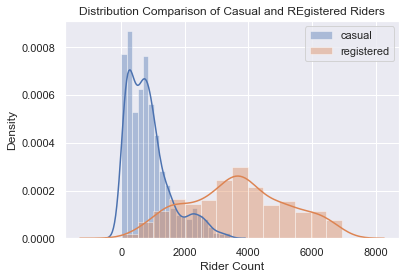

In [15]:
### BEGIN SOLUTION
sns.distplot(daily_counts['casual'], label = 'casual')
sns.distplot(daily_counts['registered'], label = 'registered')
plt.legend()
plt.xlabel('Rider Count')
plt.ylabel('Density')
plt.title('Distribution Comparison of Casual and REgistered Riders')
plt.savefig('images/iamcool')
### END SOLUTION

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

In [16]:
### BEGIN SOLUTION
q2b = """The casual riders distribution has a sharp peak at 1000 that may be bimodal. 
This distribution is skewed right and has a long right tail with a small set of daily counts around 2500.

The distribution of registered riders has a more symmetric distribution centered around almost 4000 daily riders.
This distribution does not have heavy skew. It's spread is much wider than the casual riders."""
### END SOLUTION

### Question 2c

The density plots do not show us how the daily counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help with over plotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

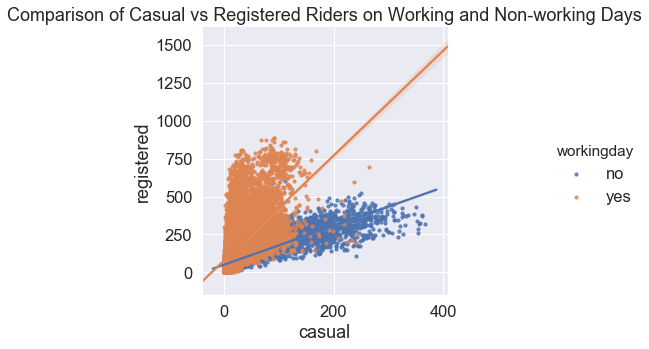

In [17]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)


### BEGIN SOLUTION
sns.lmplot(x='casual', y='registered', hue='workingday', data = bike, scatter_kws = {'s':10});
plt.title('Comparison of Casual vs Registered Riders on Working and Non-working Days')
plt.savefig("images/hahaha")

### END SOLUTION

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend?

Why might we be concerned with overplotting in examining this relationship? By "overplotting", we're referring to the term used in chapter 6.5 of the [textbook](http://www.textbook.ds100.org/ch/06/viz_principles_2.html).


In [18]:
### BEGIN SOLUTION
q2d = r"""
There appears to be a linear relationship between the counts for registered and casual riders,
and this relationship depends on whether the day is a work day or a weekend day (stronger relationship on working day)

Given the overplotting, it is difficult to discern the relationships because
for example, we can't see if there might be blue points that have been 
plotted over by green points and vice versa.
"""

### END SOLUTION

---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
The scatter plot you made in question 2c makes clear the separation between the work days and non-work days.  However, the overplotting
makes it difficult to see the density of the joint counts. To address this
issue, let's try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks something like this:

<img src='images/bivariate_kde_of_daily_rider_types.png' width="600px" />

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

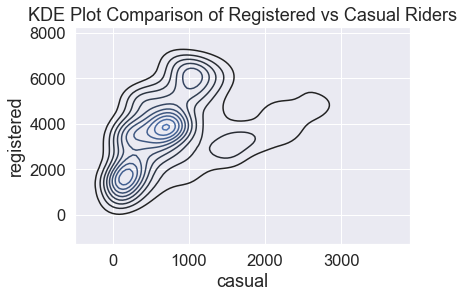

In [19]:
sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

Generating the plot with weekend and weekday separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints:** 
* You can use `loc` with a boolean array and column names at the same time, as seen in [lecture 2](https://docs.google.com/presentation/d/1qMRtloXaccvJLfyZckn-UpuG0Prb1XtJHLPWQX2OMSo/edit#slide=id.g4114e65f62_0_404).
* You will need to call kdeplot twice.
* Check out this [tutorial](http://financeandpython.com/SeabornDataVisualization/8/3.html) to see an example of how to set colors for each dataset and how to create a legend. The legend part uses some weird matplotlib syntax that we haven't learned! You'll probably find creating the legend annoying, but it's a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like).

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`.



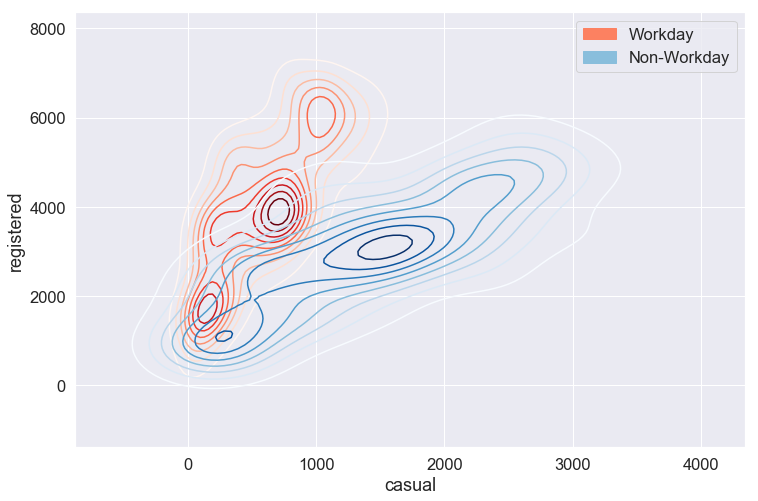

In [20]:
import matplotlib.patches as mpatches  # see the tutorial for how we use mpatches to generate this figure!

# Set 'is_workingday' to a boolean array that is true for all working_days
plt.figure(figsize=(12,8))
is_workingday = daily_counts['workingday'] == 'yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and is_workingday to splice out the relevant rows and column (casual/registered). 
casual_weekday = daily_counts.loc[is_workingday, 'casual']
registered_weekday = daily_counts.loc[is_workingday, 'registered']


# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides

# Repeat the same steps above but for rows corresponding to non-workingdays
not_workingday = daily_counts['workingday'] == 'no'
casual_weekend = daily_counts.loc[not_workingday, 'casual']
registered_weekend = daily_counts.loc[not_workingday, 'registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides

### BEGIN SOLUTION
sns.kdeplot(casual_weekday, registered_weekday, cmap="Reds")
sns.kdeplot(casual_weekend, registered_weekend, cmap="Blues")

r = sns.color_palette("Reds")[2]
b = sns.color_palette("Blues")[2]


red_patch = mpatches.Patch(color=r, label='Workday')
blue_patch = mpatches.Patch(color=b, label='Non-Workday')

plt.legend(handles=[red_patch,blue_patch])

plt.show()
### END SOLUTION



#### Question 3b

What does the contour plot suggest about the relationship between casual and registered riders for work days? For non-work days? Do you feel like it's easier to see the relationship on this countour plot, or on the plot you created for 2c? Why?

In [21]:
### BEGIN SOLUTION
q3 = """On the non-workdays, the casual and registered riders have a roughly linear relationship. 
During the work week, the relationship also appears roughly linear,
but the slope is much higher. 

Here we can see the shape of the relationship because high density regions 
are revealed that we were not able to see due to overplotting in the scatter plot."""
### END SOLUTION

#### Question 3c

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.
* `plt.suptitle` from lab 1 can be handy for setting the title where you want.
* `plt.subplots_adjust(top=0.9)` can help if your title overlaps with your plot

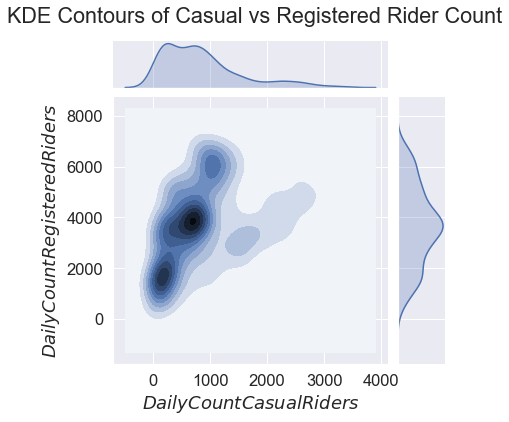

In [24]:
...

### BEGIN SOLUTION
g=sns.jointplot(x="casual", y="registered", data=daily_counts, kind="kde");
g.set_axis_labels("$Daily Count Casual Riders$", "$Daily Count Registered Riders$");
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9)
plt.savefig("images/joint_distribution_of_daily_rider_types.png", bbox_inches='tight', dpi=300);
### END SOLUTION

---
## 4: Exploring Ride Sharing and Time

### Question 4

#### Question 4a

Plot number of riders for each day in the month of June in 2011. 

Make sure to add descriptive x-axis and y-axis labels and create a legend to distinguish the line for casual riders and the line for registered riders. The end result should look like the figure below. The shaded region is a bootstrap confidence interval similar to what you learned about in Data 8. 

<img src="images/june_riders.png" width="600px" />

Make sure to include xlabel, ylabel, a legend, and a title.

**Hints:**
* Add a new Series to the `bike` datafame correpsonding to the day. You can do something similar to what you did in `hw1` when you created the `postal_code_5` Seres. 
* Make sure your day series is of type int. One way is to use the `map` method of the Series class, i.e. `s.map(int)`.
* Use `sns.lineplot`.

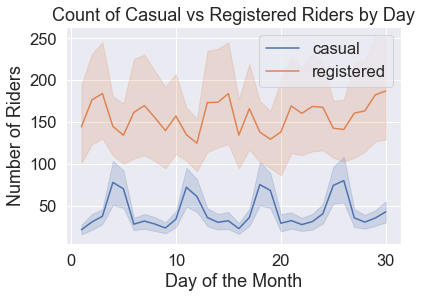

In [53]:
bike_june_11 = pd.DataFrame(bike[(bike['yr'] == 0) & (bike['mnth'] == 6)])
bike_june_11['day'] = bike_june_11['dteday'].str[-2:].map(int)
sns.lineplot(x='day', y='casual', data=bike_june_11, label='casual')
sns.lineplot(x='day', y='registered', data=bike_june_11, label='registered')
plt.title('Count of Casual vs Registered Riders by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Riders')
plt.legend()
plt.savefig("images/june_riders.png", bbox_inches='tight', dpi=300);
### BEGIN SOLUTION

### END SOLUTION

#### Question 4b

This plot has several interesting features. How do the number of casual and registered riders compare for different days of the month? What is an interesting trend and pattern you notice between the lines? Why do you think the confidence interval for the registered riders is, on average, wider than the confidence interval for casual riders?

In [22]:
### BEGIN SOLUTION
q4b = """We can see several things in this line plot. We see daily patterns in rental. 
With the weekends having fewer registered users and far more casual riders. 

The number of casual riders is always less than the number of registered riders, 
but on the week end, the counts are much closer together. 

There may be more variance among registered riders. This can be seen in the overlaid density plots we made earlier."""
### END SOLUTION

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset** (not just June 2011), stratified by rider type.  

Your plot should look like the following:

<img src="images/diurnal_bikes.png" width="600px"/>

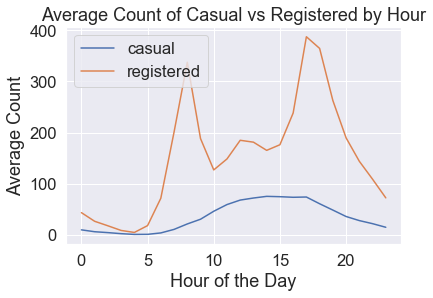

In [62]:
...

### BEGIN SOLUTION
bike['avg_casual'] = bike.groupby('hr')['casual'].mean()
bike['avg_registered'] = bike.groupby('hr')['registered'].mean()
sns.lineplot(x='hr', y ='avg_casual', data = bike, label='casual')
sns.lineplot(x='hr', y='avg_registered', data = bike, label = 'registered')
plt.title('Average Count of Casual vs Registered by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.legend()
plt.savefig("images/avg_riders.png", bbox_inches='tight', dpi=300);
### END SOLUTION

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.

In [24]:
### BEGIN SOLUTION
q5b = """In the above plot we see strong evidence of daily patterns in both datasets.  
The casual riders appear to ride throughout the day with peak hours in the mid-afternoon. 

Alternatively, while the registered riders also ride more during the day than at night there are
very strong spikes during the morning and evening commute hours with a small bump during lunch."""
### END SOLUTION

---
## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `bike` dataframe representing the proportion of casual riders out of all riders.

In [63]:
...

### BEGIN SOLUTION
bike['prop_casual'] = bike['casual'] / bike['cnt']
### END SOLUTION

In [64]:
assert int(bike["prop_casual"].sum()) == 2991

### BEGIN HIDDEN TESTS

### END HIDDEN TESTS

#### Question 6b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

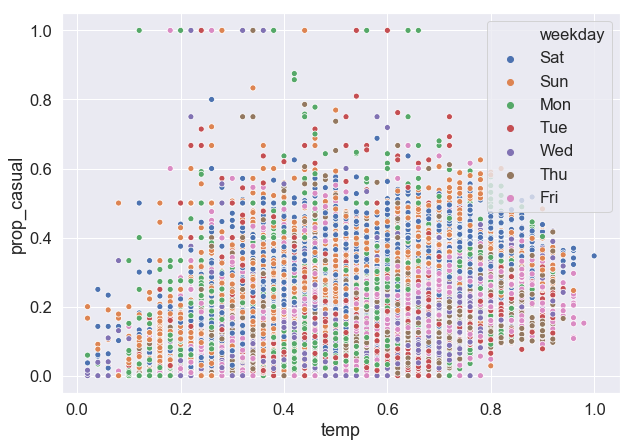

In [65]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

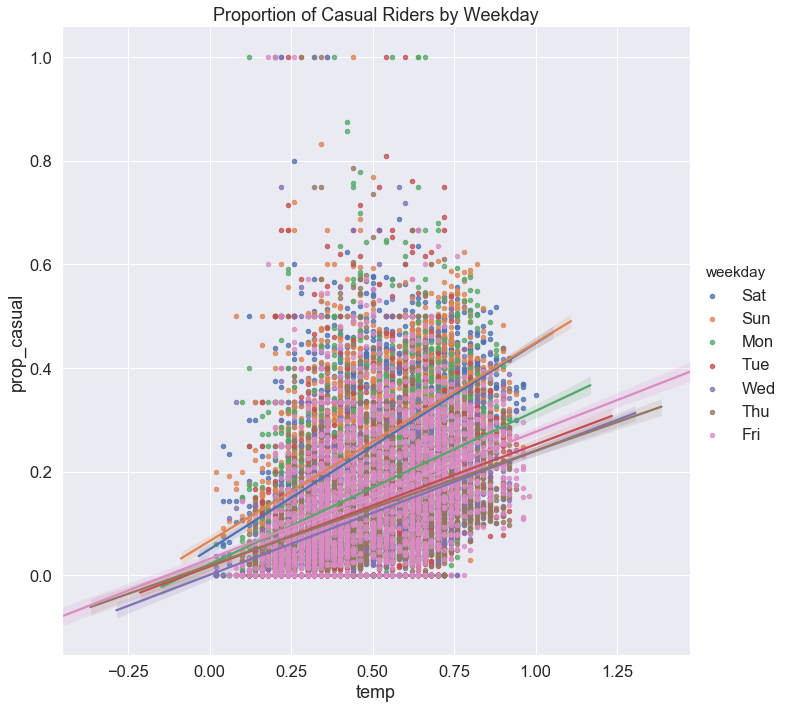

In [28]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use the "Local Smoothing" technique described in lecture. We saw an example of this with cherry blossom race times. As a reminder, the basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

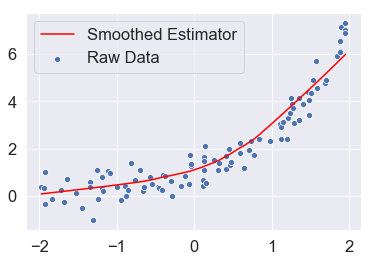

In [29]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* lowess expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to fahrenheit. By default, the temperature field ranges from 0.0 to 1.0.

Note: If you prefer putting your plot in Celsius, that's fine as well!

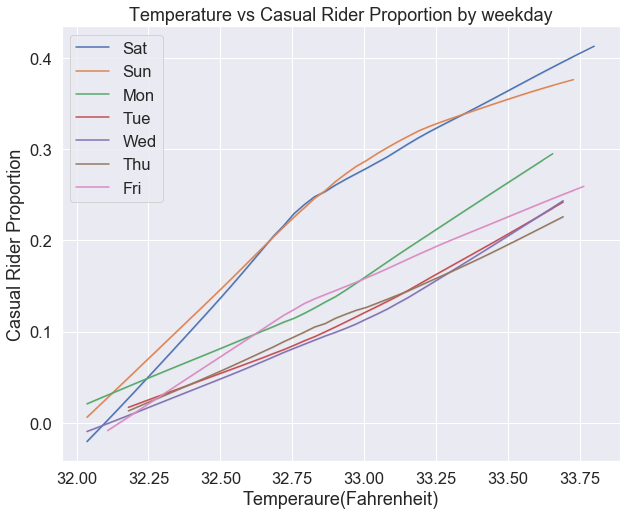

In [75]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))

### BEGIN SOLUTION
for day in bike['weekday'].unique():
    xobs = bike[bike['weekday']==day]['temp'] * 9/5 + 32
    yobs = bike[bike['weekday']==day]['prop_casual']

    ysmooth = lowess(yobs, xobs, return_sorted=False)
    sns.lineplot(xobs, ysmooth, label=day)
plt.title('Temperature vs Casual Rider Proportion by weekday')
plt.xlabel('Temperaure(Fahrenheit)')
plt.ylabel('Casual Rider Proportion')
plt.legend();
### END SOLUTION

#### Question 6c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

In [31]:
### BEGIN SOLUTION
q6c = """As temperature increases, the proportion of casual riders increases as well, and this trend
appears to continue even into very hot weather.

Weekends (Saturday, Sunday) have higher proportion of casual riders (which we saw before).
"""
### END SOLUTION

## Submission - IMPORTANT, PLEASE READ
For this assignment and future assignments (homework and projects) you will also submit your free response and plotting questions to gradescope. To do this, you can download as PDF (`File->Download As->PDF via Latex (.pdf)`). You are responsible for submitting and tagging your answers in gradescope. For each free response and plotting question, please include:

1. Relevant code used to generate the plot or inform your insights
2. The written free response or plot

We are doing this to make it easier on our graders and for you, in the case you need to submit a regrade request. Gradescope (as of now) is still better for manual grading.
